# Application for the Journal of Open Aviation Science

This document has been published for reproducing the application presented in a software paper dedicated to AeroMAPS, submitted to [Journal of Open Aviation Science](https://journals.open.tudelft.nl/joas/index). The different assumptions of this prospective scenario are given in the following. 

An illustrative 2% annual air traffic growth is assumed for the different aviation markets, i.e. lower than trend estimates by around 3%. Concerning the aircraft fleet, an accelerated fleet renewal is assumed with the introduction of more efficient aircraft architectures in 2035, considering a hydrogen one for short-range. Operational and load factor improvements are also included. Regarding the replacement of kerosene by drop-in fuels (biofuel and electrofuel here), ReFuelEU targets are considered as blending mandates. Different pathways are considered for the production of biofuel and hydrogen. Electricity production is expected to decarbonize rapidly and strongly, so that CO<sub>2</sub> emissions from electricity-based fuels will be lower than those from kerosene by 2035. On the economic side, different assumptions are made about the evolution of fuel and electricity costs as well as aircraft direct operating costs (excluding energy). Finally, a carbon price trajectory, based on *Alain Quinet, What Value Do We Attach to Climate Action?, 2019*, is implemented in the form of a tax on fossil and alternative fuel emissions. 

Moreover, in order to carry out a sustainability assessment, some hypotheses are required. A climate target of +1.8°C with a 67% chance of success is chosen as well as a moderate use of Carbon Dioxide Removal (CDR) worldwide. Median estimations are considered for biomass and electricity availability. Finally, concerning allocation rules, a grandfathering approach is assumed for climate issue, which means that 2.6% (i.e. aviation's current share of CO<sub>2</sub> emissions) of the world carbon budget is allocated for aviation. For energy resources, an illustrative allocation of 5% is assumed.

## Load and process

In [1]:
%matplotlib widget
from aeromaps.core.process import AeromapsProcess
from aeromaps.core.models import models_complex

In [2]:
process = AeromapsProcess(read_json=True, models=models_complex, fleet=True)

## Set up variables

### Aviation scenario

In [3]:
# Air traffic evolution

## Growth rate by category and decade [%]
process.parameters.growth_rate_2020_2030_short_range = 2
process.parameters.growth_rate_2030_2040_short_range = 2
process.parameters.growth_rate_2040_2050_short_range = 2
process.parameters.growth_rate_2020_2030_medium_range = 2
process.parameters.growth_rate_2030_2040_medium_range = 2
process.parameters.growth_rate_2040_2050_medium_range = 2
process.parameters.growth_rate_2020_2030_long_range = 2
process.parameters.growth_rate_2030_2040_long_range = 2
process.parameters.growth_rate_2040_2050_long_range = 2
process.parameters.growth_rate_2020_2030_freight = 2
process.parameters.growth_rate_2030_2040_freight = 2
process.parameters.growth_rate_2040_2050_freight = 2

In [4]:
# Aircraft fleet
fleet = process.fleet
fleet_model = process.fleet_model
fleet.categories["Short Range"].parameters.life = 20
fleet.categories["Medium Range"].parameters.life = 20
fleet.categories["Long Range"].parameters.life = 20
fleet_model.compute()

In [5]:
# Aircraft fleet and operation evolution - Aircraft load factor

## Aircraft load factor in 2050 [%]
process.parameters.load_factor_end_year = 89  # 2019 value: 82.399312

In [6]:
# Aircraft fleet and operation evolution - Operations

## Values for setting the logistic function
process.parameters.operations_final_gain = 8.0  # [%]
process.parameters.operations_start_year = 2025
process.parameters.operations_duration = 25.0

In [7]:
# Aircraft energy - Introduction of alternative drop-in fuels

## Share of alternative fuels in the drop-in fuel mix by decade (the rest being supplemented by kerosene) [%]
process.parameters.biofuel_share_2030 = 4.8
process.parameters.biofuel_share_2040 = 24.0
process.parameters.biofuel_share_2050 = 35.0
process.parameters.electrofuel_share_2030 = 1.2
process.parameters.electrofuel_share_2040 = 10.0
process.parameters.electrofuel_share_2050 = 35.0

In [8]:
# Various environmental settings

## Share of biofuel production pathways by decade (the rest being completed by AtJ processes) [%]
process.parameters.biofuel_hefa_fog_share_2030 = 0.7
process.parameters.biofuel_hefa_fog_share_2040 = 0.7
process.parameters.biofuel_hefa_fog_share_2050 = 0.7
process.parameters.biofuel_hefa_others_share_2030 = 3.8
process.parameters.biofuel_hefa_others_share_2040 = 3.8
process.parameters.biofuel_hefa_others_share_2050 = 3.8
process.parameters.biofuel_ft_others_share_2030 = 76.3
process.parameters.biofuel_ft_others_share_2040 = 76.3
process.parameters.biofuel_ft_others_share_2050 = 76.3
process.parameters.biofuel_ft_msw_share_2030 = 7.4
process.parameters.biofuel_ft_msw_share_2040 = 7.4
process.parameters.biofuel_ft_msw_share_2050 = 7.4

## Emission factors for electricity by decade (2019 value: 429 gCO2/kWh)
process.parameters.electricity_emission_factor_2020 = 429
process.parameters.electricity_emission_factor_2030 = 180
process.parameters.electricity_emission_factor_2040 = 75
process.parameters.electricity_emission_factor_2050 = 30

## Share of hydrogen production pathways by decade (the rest being completed by production via coal without CCS) [%]
## Distribution in 2019: Gas without CCS (71%), Coal without CCS (27%), Electrolysis (2%), Others with CCS (0%), Co-products not taken into account
process.parameters.hydrogen_electrolysis_share_2020 = 0
process.parameters.hydrogen_electrolysis_share_2030 = 50
process.parameters.hydrogen_electrolysis_share_2040 = 100
process.parameters.hydrogen_electrolysis_share_2050 = 100
process.parameters.hydrogen_gas_ccs_share_2020 = 0
process.parameters.hydrogen_gas_ccs_share_2030 = 0
process.parameters.hydrogen_gas_ccs_share_2040 = 0
process.parameters.hydrogen_gas_ccs_share_2050 = 0
process.parameters.hydrogen_coal_ccs_share_2020 = 0
process.parameters.hydrogen_coal_ccs_share_2030 = 0
process.parameters.hydrogen_coal_ccs_share_2040 = 0
process.parameters.hydrogen_coal_ccs_share_2050 = 0
process.parameters.hydrogen_gas_share_2020 = 71
process.parameters.hydrogen_gas_share_2030 = 50
process.parameters.hydrogen_gas_share_2040 = 0
process.parameters.hydrogen_gas_share_2050 = 0

In [9]:
# Cost parameters

process.parameters.co2_tax_2020 = 54
process.parameters.co2_tax_2030 = 250
process.parameters.co2_tax_2040 = 500
process.parameters.co2_tax_2050 = 775

### Sustainability assessment

In [10]:
# Environmental limits

## Carbon budgets and Carbon Dioxide Removal [GtCO2]
process.parameters.net_carbon_budget = 850.0
process.parameters.carbon_dioxyde_removal_2100 = 285.0

## Available energy resources in 2050 [EJ]
process.parameters.waste_biomass = 12
process.parameters.crops_biomass = 63
process.parameters.forest_residues_biomass = 17
process.parameters.agricultural_residues_biomass = 57
process.parameters.algae_biomass = 15
process.parameters.available_electricity = 200.0

In [11]:
# Allocation settings

## Aviation share of the global (equivalent) carbon budget [%]
process.parameters.aviation_carbon_budget_allocated_share = 2.6
process.parameters.aviation_equivalentcarbonbudget_allocated_share = 5.1

## Aviation share of the global energy resources (biomass and electricity) [%]
process.parameters.aviation_biomass_allocated_share = 5.0
process.parameters.aviation_electricity_allocated_share = 5.0

## Compute

In [12]:
process.compute()

## Results

In [17]:
print("CO2 emissions in 2050:", round(process.data["vector_outputs"]["co2_emissions"][2050],0), "MtCO2, i.e. an evolution of:", round(((process.data["vector_outputs"]["co2_emissions"][2050]/process.data["vector_outputs"]["co2_emissions"][2019])-1)*100,0), "% compared to 2019")
print("CO2 emissions per RPK in 2050:", round(process.data["vector_outputs"]["co2_emissions_per_rpk"][2050],0), "gCO2/RPK, i.e. an evolution of:", round(((process.data["vector_outputs"]["co2_emissions_per_rpk"][2050]/process.data["vector_outputs"]["co2_emissions_per_rpk"][2019])-1)*100,0), "% compared to 2019")
print("Temperature increase due to aviation in 2050:", round(process.data["vector_outputs"]["temperature_increase_from_aviation"][2050],3), "°C, i.e. an evolution of:", round(((process.data["vector_outputs"]["temperature_increase_from_aviation"][2050]/process.data["vector_outputs"]["temperature_increase_from_aviation"][2019])-1)*100,0), "% compared to 2019")
print("Direct Operating Cost including carbon tax in 2050:", round(process.data["vector_outputs"]["co2_emissions"][2050],2), "€/RPK, i.e. an evolution of:", round(((process.data["vector_outputs"]["temperature_increase_from_aviation"][2050]/process.data["vector_outputs"]["temperature_increase_from_aviation"][2019])-1)*100,0), "% compared to 2019")
print("Share of the Direct Operating Cost due to carbon tax in 2050:", round(process.data["vector_outputs"]["co2_emissions"][2050],0), "%, i.e. an evolution of:", round(((process.data["vector_outputs"]["temperature_increase_from_aviation"][2050]/process.data["vector_outputs"]["temperature_increase_from_aviation"][2019])-1)*100,0), "% compared to 2019")

CO2 emissions in 2050: 457.0 MtCO2, i.e. an evolution of: -59.0 % compared to 2019
CO2 emissions per RPK in 2050: 26.0 gCO2/RPK, i.e. an evolution of: -76.0 % compared to 2019
Temperature increase due to aviation in 2050: 0.083 °C, i.e. an evolution of: 76.0 % compared to 2019
Direct Operating Cost including carbon tax in 2050: 457.23 €/RPK, i.e. an evolution of: 76.0 % compared to 2019
Share of the Direct Operating Cost due to carbon tax in 2050: 457.0 %, i.e. an evolution of: 76.0 % compared to 2019


## Plots

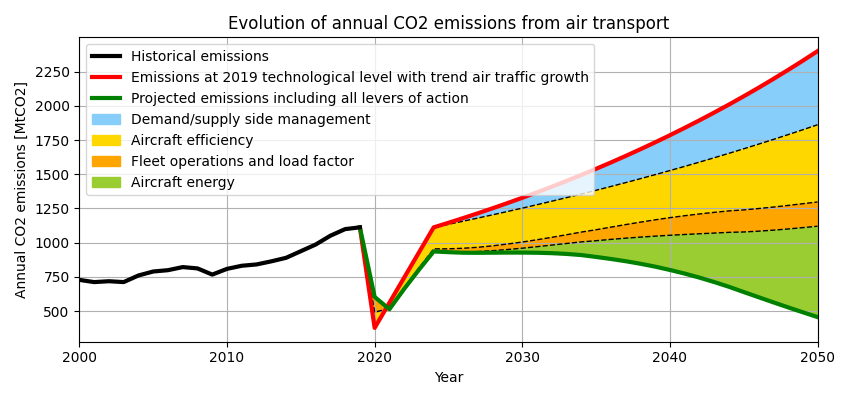

In [14]:
process.plot("air_transport_co2_emissions")

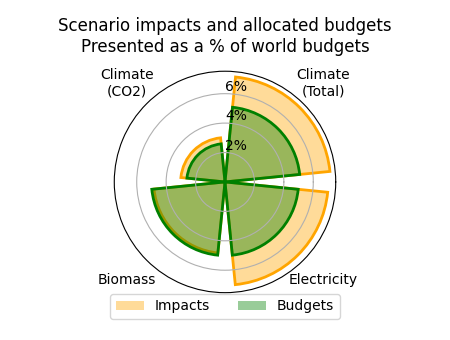

In [15]:
process.plot("multidisciplinary_assessment")

In [16]:
process.plot("drop_in_macc_curve")

NameError: Plot drop_in_macc_curve is not available. List of available plots: ['air_transport_co2_emissions', 'air_transport_climate_impacts', 'carbon_budget_assessment', 'equivalent_carbon_budget_assessment', 'biomass_resource_budget_assessment', 'electricity_resource_budget_assessment', 'multidisciplinary_assessment', 'temperature_increase_from_air_transport', 'biomass_consumption', 'electricity_consumption', 'co2_per_rpk', 'co2_per_rtk', 'passenger_kaya_factors', 'freight_kaya_factors', 'levers_of_action_distribution', 'revenue_passenger_kilometer', 'revenue_tonne_kilometer', 'available_seat_kilometer', 'total_aircraft_distance', 'load_factor', 'energy_per_ask', 'energy_per_rtk', 'energy_consumption', 'fuel_consumption_liter_per_pax_100km', 'mean_fuel_emission_factor', 'emission_factor_per_fuel', 'cumulative_co2_emissions', 'direct_h2o_emissions', 'direct_nox_emissions', 'direct_sulfur_emissions', 'direct_soot_emissions', 'equivalent_emissions', 'cumulative_equivalent_emissions', 'equivalent_emissions_ratio', 'final_effective_radiative_forcing', 'distribution_effective_radiative_forcing']